In [38]:
import numpy as np
import cv2
import os
import time
import matplotlib.pyplot as plt

In [5]:
image_a = cv2.imread('/mnt/e/Term 4/HW/DIP-HW2/data/q5/a.png', cv2.IMREAD_GRAYSCALE)
image_b = cv2.imread('/mnt/e/Term 4/HW/DIP-HW2/data/q5/b.png', cv2.IMREAD_GRAYSCALE)

print(f'Shape of image a is: {image_a.shape}')
print(f'Shape of image b is: {image_b.shape}')

Shape of image a is: (512, 512)
Shape of image b is: (512, 512)


In [19]:
if image_a is None or image_b is None:
    raise ValueError("Input images are not loaded.")
if image_a.shape != image_b.shape:
    raise ValueError("Noisy and ideal images must have the same shape.")
if image_a.ndim != 2 or image_b.ndim != 2:
    raise ValueError("Both images must be single-channel (grayscale).")

In [6]:
mean_a = np.mean(image_a)
mean_b = np.mean(image_b)

print(f"Mean intensity of noisy image (a.png): {mean_a:.2f}")
print(f"Mean intensity of ideal image (b.png): {mean_b:.2f}")
print(f"Difference in mean intensity: {abs(mean_a - mean_b):.2f}")

Mean intensity of noisy image (a.png): 133.31
Mean intensity of ideal image (b.png): 133.06
Difference in mean intensity: 0.25


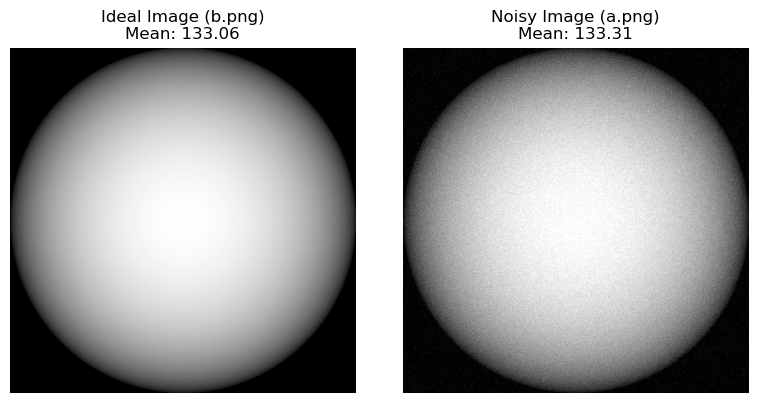

In [7]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image_b, cmap='gray')
plt.title(f"Ideal Image (b.png)\nMean: {mean_b:.2f}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_a, cmap='gray')
plt.title(f"Noisy Image (a.png)\nMean: {mean_a:.2f}")
plt.axis('off')

plt.tight_layout()
plt.show()

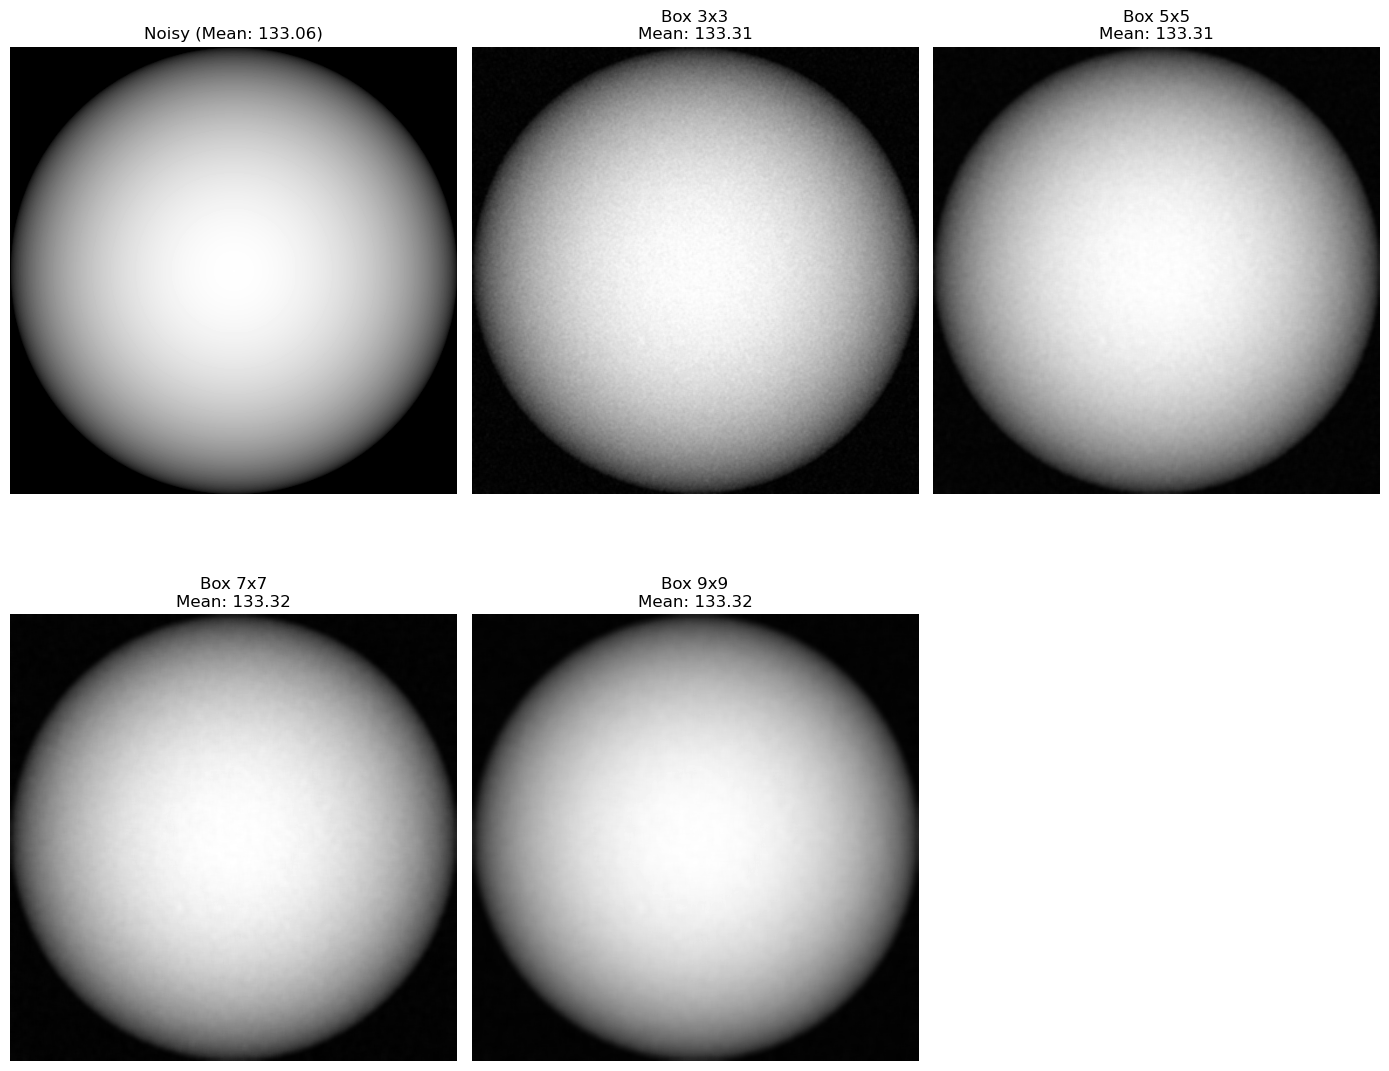

In [8]:
filter_sizes = [3, 5, 7, 9]

output_dir = '/mnt/e/Term 4/HW/DIP-HW2/results/q5'
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(14, 12))
plt.subplot(2, 3, 1)
plt.imshow(image_b, cmap='gray')
plt.title(f"Noisy (Mean: {mean_b:.2f})")
plt.axis('off')

for idx, kernel in enumerate(filter_sizes, start=2):
    filtered_image = cv2.blur(image_a, ksize=(kernel, kernel))
    mean_filtered = np.mean(filtered_image)
    
    out_path = os.path.join(output_dir, f'{kernel}.png')
    cv2.imwrite(out_path, filtered_image)

    plt.subplot(2, 3, idx)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Box {kernel}x{kernel}\nMean: {mean_filtered:.2f}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [9]:
filtered_images = {
    '3': '/mnt/e/Term 4/HW/DIP-HW2/results/q5/3.png',
    '5': '/mnt/e/Term 4/HW/DIP-HW2/results/q5/5.png',
    '7': '/mnt/e/Term 4/HW/DIP-HW2/results/q5/7.png',
    '9': '/mnt/e/Term 4/HW/DIP-HW2/results/q5/9.png'
}

In [10]:
def compute_mse(image1, image2):
    return np.mean((image1.astype('float32') - image2.astype('float32')) ** 2)

In [11]:
for k, path in filtered_images.items():
    filtered_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    mse = compute_mse(image_b, filtered_img)
    print(f'MSE of ideal image vs filtered image(kernel = {k}*{k}) is: {mse:0.4f}')

MSE of ideal image vs filtered image(kernel = 3*3) is: 13.3222
MSE of ideal image vs filtered image(kernel = 5*5) is: 8.1485
MSE of ideal image vs filtered image(kernel = 7*7) is: 7.4678
MSE of ideal image vs filtered image(kernel = 9*9) is: 7.9911


In [12]:
kernel_sizes = list(range(3, 128, 2))
mse_values = []

for k in kernel_sizes:
    filtered = cv2.blur(image_a, (k, k))
    mse = compute_mse(image_b, filtered)
    mse_values.append(mse)

min_mse = min(mse_values)
best_k = kernel_sizes[np.argmin(mse_values)]

print(f'Best kernel is : {best_k} * {best_k}')
print(f'Min mse is {min_mse}')


Best kernel is : 7 * 7
Min mse is 7.4677886962890625


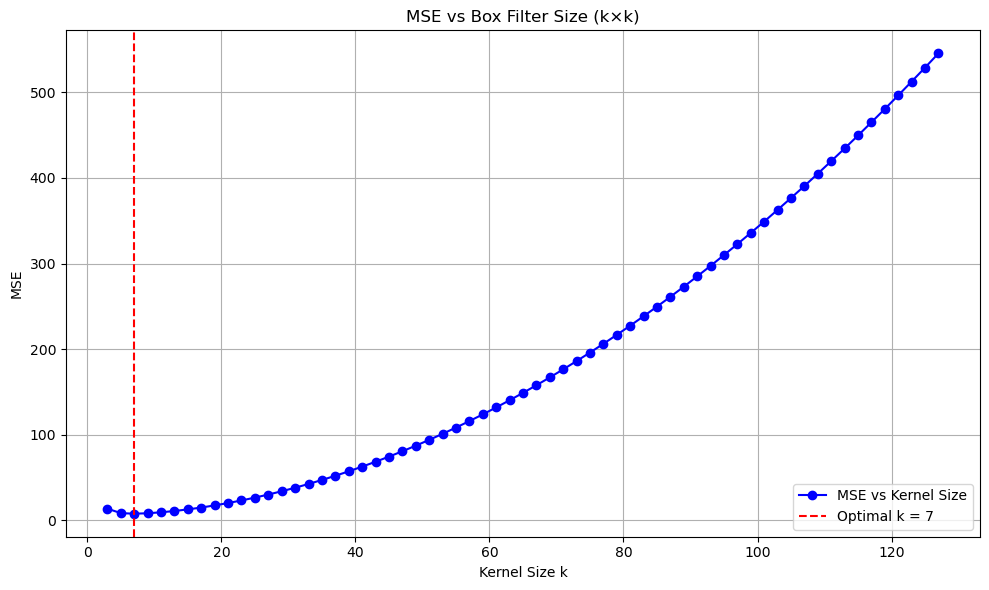

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(kernel_sizes, mse_values, marker='o', linestyle='-', color='blue', label='MSE vs Kernel Size')
plt.axvline(best_k, color='red', linestyle='--', label=f'Optimal k = {best_k}')
plt.title('MSE vs Box Filter Size (k×k)')
plt.xlabel('Kernel Size k')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()
plt.tight_layout()

In [16]:
kernel_sizes = list(range(3, 128, 2))
mse_values_sigma = []
sigma = 5

for k in kernel_sizes:
    filtered = cv2.GaussianBlur(image_a, ksize=(k, k), sigmaX=sigma, sigmaY=sigma, borderType=cv2.BORDER_DEFAULT)
    mse = compute_mse(image_b, filtered)
    mse_values_sigma.append(mse)

min_mse = min(mse_values_sigma)
best_k = kernel_sizes[np.argmin(mse_values_sigma)]

print(f'Best kernel(using gaussian blur(sigma=5)) is : {best_k} * {best_k}')
print(f'Min mse is {min_mse}')

Best kernel(using gaussian blur(sigma=5)) is : 7 * 7
Min mse is 7.3454437255859375


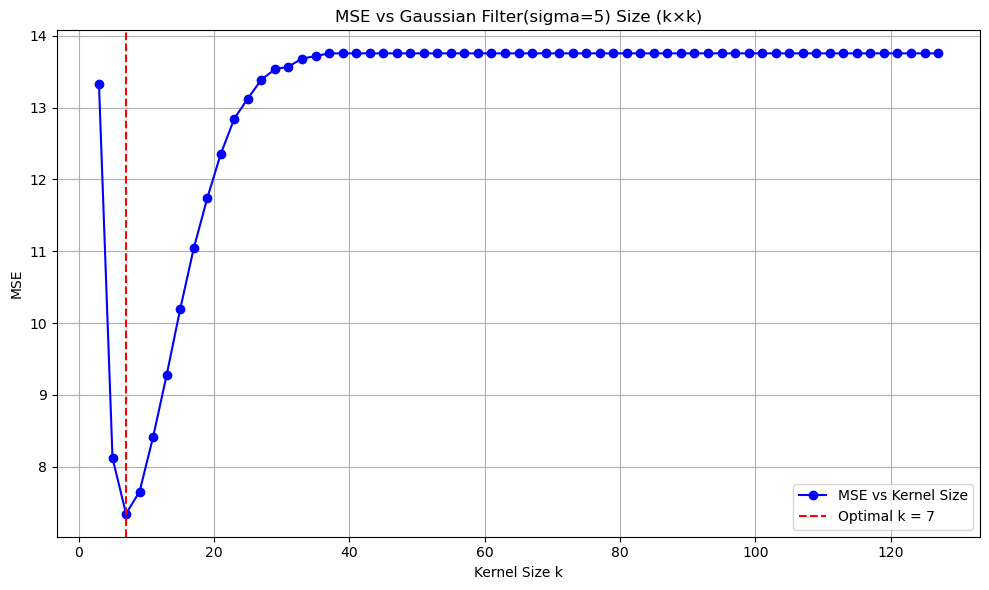

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(kernel_sizes, mse_values_sigma, marker='o', linestyle='-', color='blue', label='MSE vs Kernel Size')
plt.axvline(best_k, color='red', linestyle='--', label=f'Optimal k = {best_k}')
plt.title('MSE vs Gaussian Filter(sigma=5) Size (k×k)')
plt.xlabel('Kernel Size k')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()
plt.tight_layout()

In [20]:
sigmas = np.linspace(3, 7, num=len(kernel_sizes), dtype=np.float32)

In [30]:
mse_map = np.zeros((len(sigmas), len(kernel_sizes)), dtype=np.float32)
best_guess = {'k': None, 'sigma': None, 'mse': np.inf, 'img': None}

In [39]:
start_time = time.time()

for i, s in enumerate(sigmas):
    for j, k in enumerate(kernel_sizes):
        g = cv2.GaussianBlur(image_a, ksize=(k, k), sigmaX=float(s), sigmaY=float(s), borderType=cv2.BORDER_DEFAULT)
        mse_g = compute_mse(image_b, g)
        mse_map[i, j] = mse_g

        if mse_g < best_guess['mse']:
            best_guess['mse'] = mse_g
            best_guess['k'] = k
            best_guess['sigma'] = s
            best_guess['img'] = g

end_time = time.time()

execution_time_2D = end_time - start_time

print("Execution time:", execution_time_2D, "seconds")
print(f"Best mse is for kernel size:{best_guess['k']} with sigma:{best_guess['sigma']} and mse={best_guess['mse']}")

Execution time: 20.579331159591675 seconds
Best mse is for kernel size:7 with sigma:3.0 and mse=7.237117767333984


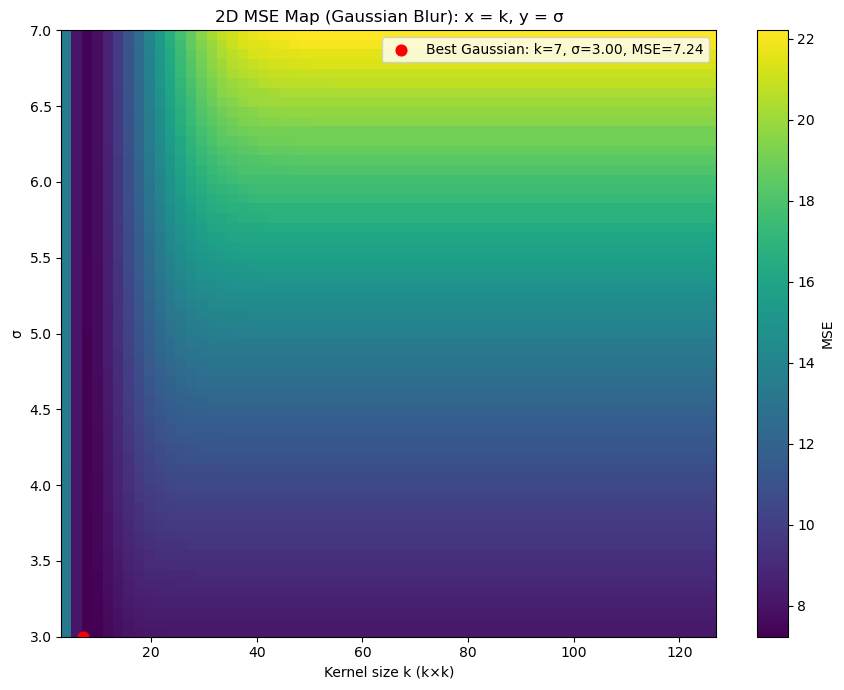

In [36]:
fig, ax = plt.subplots(figsize=(9, 7))
im = ax.imshow(
    mse_map,
    origin='lower',
    aspect='auto',
    extent=[kernel_sizes[0], kernel_sizes[-1], sigmas[0], sigmas[-1]]
)
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('MSE')

ax.scatter([best_guess['k']], [best_guess['sigma']], s=60, marker='o',  color='red',
           label=f"Best Gaussian: k={best_guess['k']}, σ={best_guess['sigma']:.2f}, MSE={best_guess['mse']:.2f}")

ax.set_title('2D MSE Map (Gaussian Blur): x = k, y = σ')
ax.set_xlabel('Kernel size k (k×k)')
ax.set_ylabel('σ')
ax.legend()
plt.tight_layout()
plt.show()

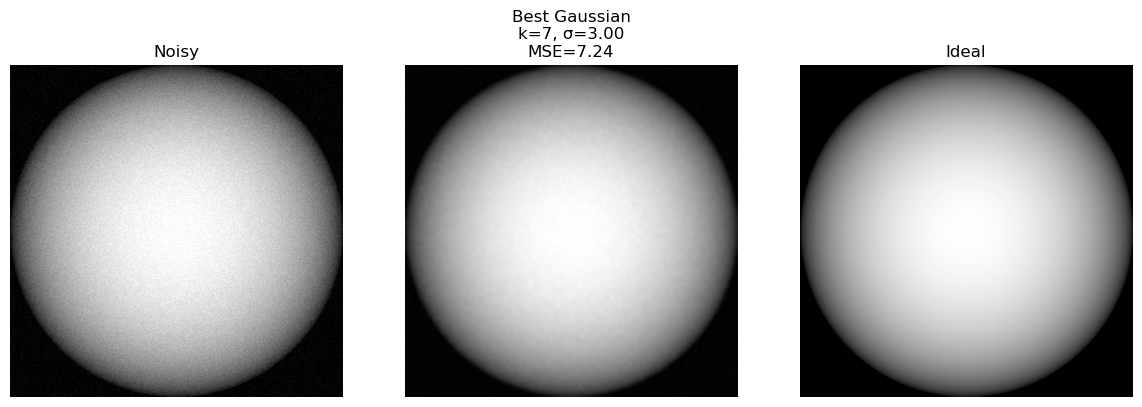

In [37]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(image_a, cmap='gray'); plt.title('Noisy'); plt.axis('off')
plt.subplot(1, 3, 2); plt.imshow(best_guess['img'], cmap='gray')
plt.title(f'Best Gaussian\nk={best_guess["k"]}, σ={best_guess["sigma"]:.2f}\nMSE={best_guess["mse"]:.2f}')
plt.axis('off')
plt.subplot(1, 3, 3); plt.imshow(image_b, cmap='gray'); plt.title('Ideal'); plt.axis('off')
plt.tight_layout()
plt.show()

In [43]:
mse_map_1D = np.zeros((len(sigmas), len(kernel_sizes)), dtype=np.float32)
best_guess_1D = {'k': None, 'sigma': None, 'mse': np.inf, 'img': None}

In [44]:
start_time = time.time()

for i, s in enumerate(sigmas):
    for j, k in enumerate(kernel_sizes):
        g_1D = cv2.GaussianBlur(image_a, (k, 1), sigmaX=sigma, sigmaY=0)
        g_1D = cv2.GaussianBlur(g_1D, (1, k), sigmaX=0, sigmaY=sigma)
        mse_g = compute_mse(image_b, g_1D)
        mse_map_1D[i, j] = mse_g

        if mse_g < best_guess_1D['mse']:
            best_guess_1D['mse'] = mse_g
            best_guess_1D['k'] = k
            best_guess_1D['sigma'] = s
            best_guess_1D['img'] = g

end_time = time.time()

execution_time_1D = end_time - start_time

print("Execution time:", execution_time_1D, "seconds")
print(f"Best mse is for kernel size:{best_guess_1D['k']} with sigma:{best_guess_1D['sigma']} and mse={best_guess_1D['mse']}")

Execution time: 9.343830823898315 seconds
Best mse is for kernel size:7 with sigma:3.0 and mse=7.359321594238281
